In [3]:
import os
import subprocess
import csv

def embed_data_with_openstego(cover_image, data_file, password, output_image):
    # check if the cover image exists
    try:
        subprocess.run(['openstego', 'embed', '-a', 'randomlsb', '-mf', data_file, '-cf', cover_image, '-p', password, '-sf', output_image], check=True)
    except subprocess.CalledProcessError as e:
        raise Exception('Error embedding data with openstego: ' + str(e))

In [2]:
def get_embedded_message_openstego(image_file, password, output_file):
    # check if the image file exists
    try:
        subprocess.run(['openstego', 'extract', '-a', 'randomlsb', '-p', password, '-sf', image_file, '-xf', output_file], check=True)
    except subprocess.CalledProcessError as e:
        raise Exception('Error extracting data with openstego: ' + str(e))


In [4]:
def initialize_csv(output_csv):
    with open(output_csv, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Image Path", "Data Size (bytes)", "PSNR", "SSIM", "Data Integrity", "Images Match"])


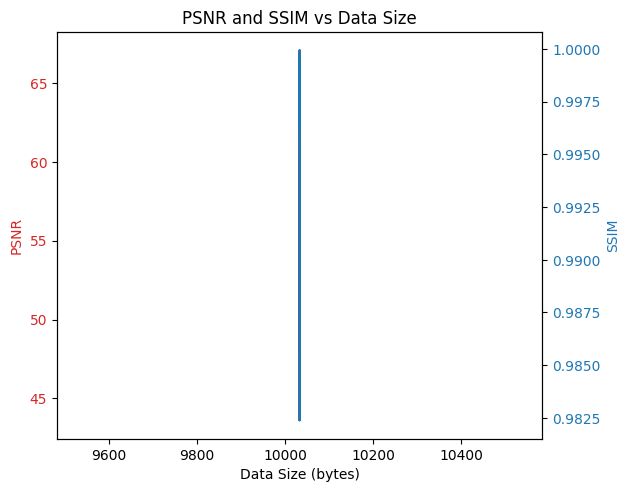

In [7]:
import matplotlib.pyplot as plt

def plot_results(csv_filename):
    sizes, psnrs, ssims, integrities, matches = [], [], [], [], []
    
    with open(csv_filename, mode='r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            if ('Error' in row[0]):
                continue
            sizes.append(int(row[1]))
            psnrs.append(float(row[2]))
            ssims.append(float(row[3]))
            integrities.append(row[4] == 'True')
            matches.append(row[5] == 'True')
    
    # Plotting
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Data Size (bytes)')
    ax1.set_ylabel('PSNR', color=color)
    ax1.plot(sizes, psnrs, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('SSIM', color=color)  # we already handled the x-label with ax1
    ax2.plot(sizes, ssims, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title('PSNR and SSIM vs Data Size')
    plt.show()

plot_results('./experiment_results_steghide.csv')